<a href="https://colab.research.google.com/github/wilberquito/AMLProject/blob/main/AMLProject_finalnotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Project: Image Classification
## Advanced Machine Learning


> Wilber E. Bermeo Quito 
>
> Judit Quintana Massana
>
> April 2023

*You can find the source code at [this repository](https://gitfront.io/r/wilberquito/6M8XPemf3m6W/AMLProject/)*

## Introduction

In the subject of 'Advanced Techniques of Machine Learning', we have been asked to build an artificial intelligence for image classification using a deep learning approach. In this coursework, we are going to use the international dataset CIFAR-10, consisting of 60.000 32x32 color images of 10 different object classes (6.000 images per class).

The aim of this paper is to show what steps we have followed to configure our machine learning model.


### CIFAR-10 dataset

The CIFAR-10 dataset is a collection of 60,000 images that are commonly used for machine learning and computer vision research. The dataset contains 10 classes of objects, with 6,000 images per class. Each image is a 32x32 color image in the RGB format, meaning that each pixel is represented by three values representing the intensity of red, green, and blue color channels.

The 10 classes in the CIFAR-10 dataset are:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

The dataset is split into three parts: a training set a validation set and a test set. The training set contains 40,000 images, while the test set contains 10,000 images, as well as the valid set. All datasets contain a balanced number of images per class.

### Used tool: pytorch

PyTorch is a popular open-source machine learning framework that is widely used for building and training neural networks. There are several reasons why this tool is a good choice for working with the CIFAR-10 dataset. 

It's efficient at data loading: PyTorch provides efficient data loading and preprocessing utilities, such as the DataLoader and Transform classes, which can help efficiently load and preprocess the images in the CIFAR-10 dataset. Flexibility: Unlike other tools like fastAI, Pytorch is highly costumable. Has a large and growing ecosystem of third-party packages and libraries, has a Pythonic interface, which makes it easy to write custom code to modify and extend the framework, PyTorch's dynamic computation graph also makes it easier to debug neural networks...

#### Transfer learning

Transfer learning is a machine learning technique that involves taking a pre-trained neural network and adapting it to a new task. Instead of starting from scratch and training a neural network from random initialisation, transfer learning allows you to leverage the knowledge and features learned from a pre-existing neural network that has been trained on a related task.

In the case of the CIFAR-10 dataset, transfer learning can be particularly useful because the dataset is relatively small, with only 60,000 images. This can make it challenging to train a deep neural network from scratch, as the network may not have enough data to learn meaningful features. By using transfer learning, you can leverage the pre-trained features of a neural network that has been trained on a similar task, such as the ImageNet dataset, which contains millions of images.

#### Fine-tuning

Fine-tuning in machine learning refers to the process of taking a pre-trained model and then further training it on a specific task or dataset.

When we fine-tune a pre-trained model, we don't start the training process from scratch; instead, we use the pre-trained model's learned features and weights as a starting point, and then continue training on the new dataset. This process helps the model learn more specialized features for the new dataset and can significantly improve the model's performance.

Fine-tuning is commonly used in transfer learning, where we use pre-trained models as a starting point for training new models for specific tasks.

## Code structure

We have structured our notebook for working with exernal scripts. This handmade scripts contain the logic of the program and are stored in the modular folder. 

 - **Utils** -  Contains a set of diferent funtions to visualize, setup and modify models. 
 - **Optim** - Contains the optimizers.
 - **Engine** - Contains functions for training and testing a PyTorch model.
 - **Models** - Contais the diferent models used.
 - **Evaluate** - Script to evaluate models the different models.
 - **Datasets** - Loads datasets
 - **Ensemble** - Script to ensemble predictions from differents models.



## Methodology

We have used a simple but effective methodology to obtain the bests results. 

We have trained 7 different models using diferent pre-trained neuronal networks:
 - [EfficientNet_V2_S](https://pytorch.org/vision/main/models/generated/torchvision.models.efficientnet_v2_s.html#efficientnet-v2-s)
 - [Resnet50](https://pytorch.org/vision/master/models/generated/torchvision.models.resnet50.html)
 - [Resnet50 with FastAI configuration](https://pytorch.org/vision/master/models/generated/torchvision.models.resnet50.html)
 - [Resnet50 with exotic configuration](https://pytorch.org/vision/master/models/generated/torchvision.models.resnet50.html)
 - [RESNEXT50_32X4D](https://pytorch.org/vision/main/models/generated/torchvision.models.resnext50_32x4d.html#resnext50-32x4d)
 - [Resnet101](https://pytorch.org/vision/main/models/generated/torchvision.models.resnet101.html)
 - [MAXVIT_T](https://pytorch.org/vision/main/models/generated/torchvision.models.maxvit_t.html)

All this models have gone though a 2-3 fine-tuning training and a 10 epoch training. 

Finally we have grouped the best ones to build an ensemble. 

- EfficientNet_V2_S
- Resnet50
- Resnet50 with FastAI configuration
- Resnet50 with exotic configuration
- Resnet101
- AMLMAXVIT_T


### Ensemble

Ensemble learning is a machine learning technique where multiple models are trained and combined to improve the overall performance of the system. The idea behind ensemble learning is to use the strengths of different models and combine their predictions to make more accurate and robust predictions than any single model.

The project has 2 kind of ensemble.

- Probability average assembling
- Test time data augmentation

## Loading and visualizing the dataset

If you want to execute the notebook by your own, we inite you joining the [shared google drive folder](https://drive.google.com/drive/folders/1T3k3CwOzGuR_HCJ-imZP6k_wJsE16MP3?usp=sharing) where all the data relies. 

To make it work, you have to put it in 'My Drive' as a shortcut folder. You can follow the instructions of how to do it [here](https://support.google.com/drive/answer/9700156?hl=en&co=GENIE.Platform%3DDesktop).

In [ ]:
#importing required libraries to import files from google colab
import zipfile
from pathlib import Path

In [ ]:
#assuring we are working in colab environment
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [ ]:
#downloading data and python scripts
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')

    data_path = Path('/content/drive/MyDrive/AML/dataset_CIFAR10.zip')
    with zipfile.ZipFile(data_path,"r") as zip_ref:
        zip_ref.extractall("data")

    data_path = Path('/content/drive/MyDrive/AML/modular.zip')
    with zipfile.ZipFile(data_path,"r") as zip_ref:
        zip_ref.extractall(".")

Mounted at /content/drive


In [ ]:
#installing torch vision
if IN_COLAB:
    ! pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


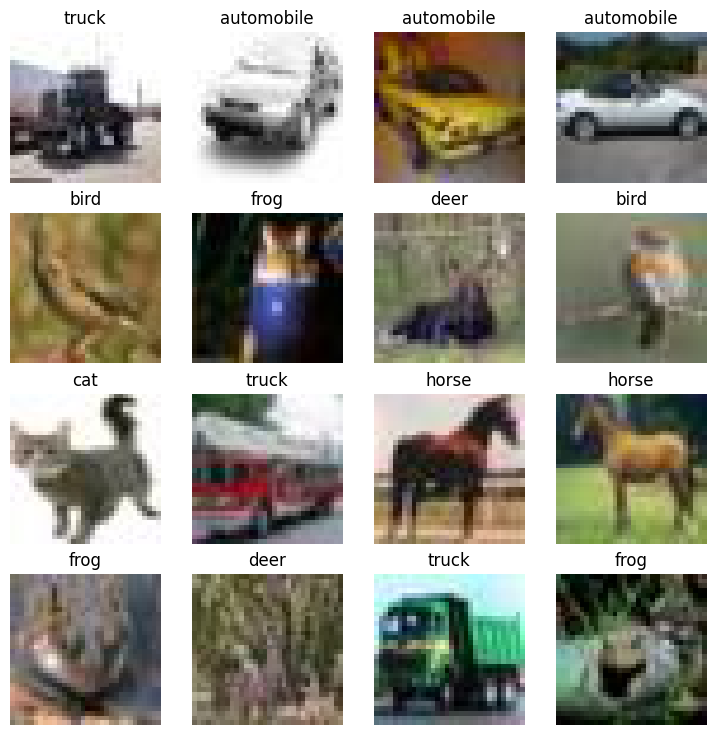

In [ ]:
#importing required libraries to visualize data
import torchvision
import modular.utils as utils
import torchvision.transforms as transforms

#preview of the dataset
prev_dataset = torchvision.datasets.ImageFolder(root='data/train',transform=transforms.ToTensor())
utils.show_grid_preview(prev_dataset)

## Model training

### Resnet50 
ResNet50 is a 50-layer neural network architecture that uses residual connections to make it easier to train very deep neural networks. The basic idea behind residual connections is that instead of trying to learn the direct mapping from the input to the output of a layer, the neural network learns the residual mapping, which is the difference between the output and the input. This makes it easier for the neural network to learn complex features and patterns, and allows it to train deeper networks with better performance.



In [ ]:
import modular.models as models
#loading resnet 50
amlresnet50 = models.AMLResnet50(10)
#transforms that resnet does to data
amlresnet50.transforms

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 96.4MB/s]


Compose(
    Resize(size=232, interpolation=bilinear, max_size=None, antialias=warn)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

Transormations applied:
 - Resize which resizes the image to a square shape of 232x232 pixels using bilinear interpolation method. The max_size argument is not set, so the image is not resized if any of its dimensions are already smaller than 232 pixels. If antialias is set to 'warn', it will emit a warning message if antialiasing cannot be performed.
 - CenterCrop, which crops the center of the image to a size of 224x224 pixels.
 - ToTensor, which converts the image to a PyTorch tensor.
 - Normalize, which normalizes the tensor by subtracting the mean and dividing by the standard deviation of the RGB color channels.

In [ ]:
#installing torch info
if IN_COLAB:
  ! pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchinfo import summary

#We visualize the model structure
batch_size = 16
img_size = 256
summary(model=amlresnet50, 
        input_size=(32, 3, img_size, img_size),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

/usr/local/lib/python3.9/dist-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/usr/local/lib/python3.9/dist-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
AMLResnet50 (AMLResnet50)                     [32, 3, 256, 256]    [32, 10]             --                   Partial
├─ResNet (net)                                [32, 3, 256, 256]    [32, 2048]           --                   False
│    └─Conv2d (conv1)                         [32, 3, 256, 256]    [32, 64, 128, 128]   (9,408)              False
│    └─BatchNorm2d (bn1)                      [32, 64, 128, 128]   [32, 64, 128, 128]   (128)                False
│    └─ReLU (relu)                            [32, 64, 128, 128]   [32, 64, 128, 128]   --                   --
│    └─MaxPool2d (maxpool)                    [32, 64, 128, 128]   [32, 64, 64, 64]     --                   --
│    └─Sequential (layer1)                    [32, 64, 64, 64]     [32, 256, 64, 64]    --                   False
│    │    └─Bottleneck (0)                    [32, 64, 64, 64]     [32, 256, 64,

#### Results
